## Importing Needed Libraries

In [2]:
import networkx as nx
from datetime import datetime
from nxviz import MatrixPlot
import collections
from matplotlib import pyplot as plt
import pandas as pd

c:\Users\BatoulDiab\AppData\Local\Programs\Python\Python312\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


## Import Dataset and Create The Network

In [3]:
print(datetime.now())
g = nx.Graph()
f = open("astrophy.txt", "r")
for x in f:
    nodes= x.split()
    if (not g.has_edge(nodes[0],nodes[1])):
        g.add_edge(nodes[0],nodes[1])
f.close()
g.remove_edges_from(nx.selfloop_edges(g))
print('Number of nodes', len(g.nodes))
print('Number of edges', len(g.edges))
print('Average degree', sum(dict(g.degree).values()) / len(g.nodes))

2023-11-08 11:03:18.161027
Number of nodes 18772
Number of edges 198050
Average degree 21.100575324952057


A higher average degree (which is the number of edges connected to a node on average) suggests that, on average, nodes in the graph are more connected to other nodes. This could indicate a dense or well-connected network.

## Draw the Network Graph

2023-11-04 21:36:52.176018


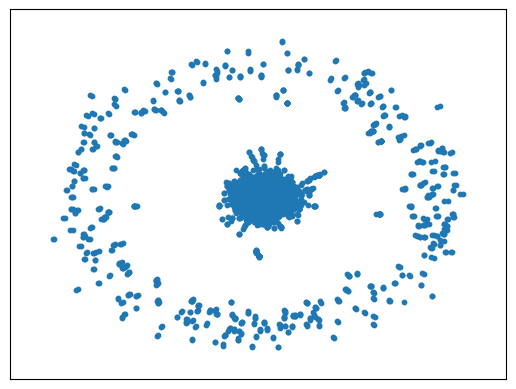

2023-11-04 22:32:02.310113


In [24]:
print(datetime.now())
plt.clf()
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10)
nx.draw_networkx_edges(g, pos, edge_color='gray', alpha=0.1)
plt.show()
print(datetime.now())

## Average Shortest Path Diameter

In [3]:
#This take SOOO much time on my weak laptop, i wasn't able to execute it!
print(datetime.now())
pathSum=0
counter=0
counterPaths=0
maxPath=0
for source in list(g.nodes):
    for sink in list(g.nodes):
        if nx.has_path(g, source, sink):
            p=nx.shortest_path_length(g, source=source, target=sink, weight=None, method='dijkstra')
            if p>maxPath:
                maxPath=p
            pathSum=pathSum+p
            counterPaths=counterPaths+1
    counter=counter+1
    if counter==10 or counter==500 or counter==1000 or counter==3000 or counter==6000 or counter==10000 or counter==14000: 
        print(counter,"/",g.number_of_nodes(),",",datetime.now())
asp=pathSum/counterPaths
print("average shortest path= ",asp)
print("diameter= ",maxPath)
print(datetime.now())

2023-11-04 22:48:29.663569
10 / 18772 , 2023-11-04 22:50:10.104472
500 / 18772 , 2023-11-05 00:19:55.745334
1000 / 18772 , 2023-11-05 02:07:36.682578
3000 / 18772 , 2023-11-05 09:44:33.939510
6000 / 18772 , 2023-11-05 20:54:19.126204
10000 / 18772 , 2023-11-06 13:02:53.136510
14000 / 18772 , 2023-11-07 05:39:13.091491
average shortest path=  4.193741968385158
diameter=  14
2023-11-07 19:26:51.409747


## Degree Distribution

2023-11-07 20:22:11.262419
check file degreedistribution.txt


[504, 427, 420, 418, 387]

<Figure size 640x480 with 0 Axes>

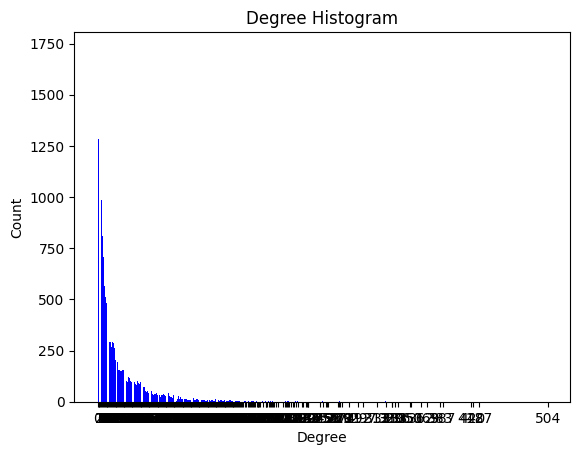

In [8]:
print(datetime.now())
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree distribution
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.clf()
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
mostImportantNodes=sorted(nx.degree(g), key = lambda x: x[1], reverse=True)

#save the most 100 important nodes in a descending order
file=open("degreedistribution.txt","w")
str1="degree distribution log:\n"
file.write(str1)
for n in range(0,g.number_of_nodes()):
        tup=mostImportantNodes[n]
        str1=str(tup[0])+' with degree distribution: '+str(tup[1])+'\n'
        file.write(str1)

file.close()
print("check file degreedistribution.txt")
#highest 5 degrees
degree_sequence[:5]

## Centrality Measures for Nodes Importance Assessment

Degree Centrality (Method 1)

In [11]:
#get neighbors for each node
node_to_neighbors_mapping = [(node, len(list(g.neighbors(node)))) for node in g.nodes()]
node_to_neighbors_mapping[:5]
#map neighbors as numbers counted for each node
node_to_neighbors_ser = pd.Series(data=dict(node_to_neighbors_mapping))
node_to_neighbors_ser.sort_values(ascending=False).head()

53213    504
35290    427
38109    420
62821    418
93504    387
dtype: int64

Degree Centrality (Method 2)

In [12]:
mostImportantNodes=sorted(nx.degree(g), key = lambda x: x[1], reverse=True)
mostImportantNodes[:5]

[('53213', 504),
 ('35290', 427),
 ('38109', 420),
 ('62821', 418),
 ('93504', 387)]

Degree Centrality (Method 3)

In [13]:
mostImportantNodes=sorted(nx.degree_centrality(g).items(), key=lambda x : x[1], reverse=True)

#save the most 100 important nodes in a descending order
file=open("degreecentrality-mostImportantNodes.txt","w")
str1="Important nodes according to degree centrality:\n"
file.write(str1)
for n in range(0, len(mostImportantNodes)):
        tup=mostImportantNodes[n]
        str1=str(tup[0])+' with degree centrality: '+str(tup[1])+'\n'
        file.write(str1)

file.close()

print("check file degreecentrality-mostImportantNodes.txt")
mostImportantNodes[:5]

check file degreecentrality-mostImportantNodes.txt


[('53213', 0.026849928080549784),
 ('35290', 0.022747855734910234),
 ('38109', 0.02237494006712482),
 ('62821', 0.022268392733471844),
 ('93504', 0.02061690906185073)]

Betweenness Centrality

In [14]:
print(datetime.now())
mostImportantNodes=sorted(nx.betweenness_centrality(g, normalized=False).items(), key=lambda x : x[1], reverse=True)
print(datetime.now())

#save the most 100 important nodes in a descending order
file=open("betweennesscentrality-mostImportantNodes.txt","w")
str1="Most 100 important nodes according to betweenness centrality:\n"
file.write(str1)
for n in range(0,100):
        tup=mostImportantNodes[n]
        str1=str(tup[0])+' with betweenness centrality: '+str(tup[1])+'\n'
        file.write(str1)

file.close()

print("check file betweennesscentrality-mostImportantNodes.txt")
print(datetime.now())
mostImportantNodes[:5]

#to make it normalized just change the (normalized=False) parameter to True or remove it and it will be true by default

2023-11-07 20:31:36.678613
2023-11-07 22:16:47.271260
check file betweennesscentrality-mostImportantNodes.txt
2023-11-07 22:16:47.288577


[('1086', 4260511.545789756),
 ('111161', 2159144.8207292436),
 ('85176', 2043067.7201292105),
 ('4636', 1958573.4073337582),
 ('35290', 1774651.061963982)]

Load Centrality

In [15]:
print(datetime.now())
mostImportantNodes=sorted(nx.load_centrality(g).items(), key=lambda x : x[1], reverse=True)
print(datetime.now())

#save the most 100 important nodes in a descending order
file=open("loadcentrality-mostImportantNodes.txt","w")
str1="Most 100 important nodes according to load centrality:\n"
file.write(str1)
for n in range(0,len(mostImportantNodes)):
        tup=mostImportantNodes[n]
        str1=str(tup[0])+' with load centrality: '+str(tup[1])+'\n'
        file.write(str1)

file.close()

print("check file loadcentrality-mostImportantNodes.txt")
print(datetime.now())
mostImportantNodes[:5]

2023-11-07 22:58:30.147116
2023-11-08 00:17:37.178582
check file loadcentrality-mostImportantNodes.txt
2023-11-08 00:17:37.245484


[('1086', 0.023482727864499054),
 ('85176', 0.011293075614574166),
 ('111161', 0.011209696155190643),
 ('4636', 0.010301386129027531),
 ('84122', 0.009057165049593021)]

Closeness Centrality

In [16]:
print(datetime.now())
mostImportantNodes=sorted(nx.closeness_centrality(g, u=None, distance=None).items(), key=lambda x : x[1], reverse=True)
print(datetime.now())

#save the most 100 important nodes in a descending order
file=open("closenesscentrality-mostImportantNodes.txt","w")
str1="Most 100 important nodes according to closeness centrality:\n"
file.write(str1)
for n in range(0,len(mostImportantNodes)):
        tup=mostImportantNodes[n]
        str1=str(tup[0])+' with closeness centrality: '+str(tup[1])+'\n'
        file.write(str1)

file.close()

print("check file closenesscentrality-mostImportantNodes.txt")
print(datetime.now())
mostImportantNodes[:5]

2023-11-08 08:16:39.221480
2023-11-08 08:48:06.785340
check file closenesscentrality-mostImportantNodes.txt
2023-11-08 08:48:06.879489


[('62821', 0.33362442980975787),
 ('53213', 0.33253925042877874),
 ('1086', 0.33162850252538423),
 ('92790', 0.331248888198253),
 ('35290', 0.33117820874661724)]

## Get All Pairs Shortest Path

In [17]:
file=open("allPairsShortestPath.txt","w")
print(datetime.now())
counter=0
for source in list(g.nodes):
    str1="\nFinding All Shortest Paths Of Node: "+source+"\n"
    file.write(str1)
    for sink in list(g.nodes):
        if nx.has_path(g, source, sink):
            p=nx.shortest_path_length(g, source=source, target=sink, weight=None, method='dijkstra')
            sp=str(p)
            str1=source+ ":" +sink+ " path="+sp+",\n"
            file.write(str1)
        else :
            str1=source+ ":" +sink+ " no path,"+"\n"
            file.write(str1)
    counter=counter+1
    if counter==100: #running all nodes will fail the program (it will be not responding)
        #stop at the 100th node 
        break

file.close()
print(datetime.now())
print("check file allPairsShortestPath.txt")

2023-11-08 10:38:18.195981
2023-11-08 10:46:01.330407
check file allPairsShortestPath.txt


Get All Pairs Shortest Path --of a certain node--

In [6]:
# source = input("Enter the node input:")
source = '53213'
if (g.has_node(source)):
    strnode="node"+source+"-allShortestPath.txt"
    file=open(strnode,"w")
    str1="\nFinding All Shortest Paths Of Node: "+source+"\n"
    file.write(str1)
    for sink in list(g.nodes):
        if nx.has_path(g, source, sink):
            p=nx.shortest_path_length(g, source=source, target=sink, weight=None, method='dijkstra')
            sp=str(p)
            str1=source+ ":" +sink+ " path="+sp+",\n"
            file.write(str1)
        else :
            str1=source+ ":" +sink+ " no path,"+"\n"
            file.write(str1)
    file.close()
else:
    print("This node does not exit in this graph")

print(datetime.now())
print("check file node",source,"-allShortestPath.txt")

2023-11-08 11:04:02.611527
check file node 53213 -allShortestPath.txt


## Finding Giant Component

In [10]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
GC = g.subgraph(Gcc[0])
print('Number of nodes', len(GC.nodes))
print('Number of edges', len(GC.edges))
print('Average degree', sum(dict(GC.degree).values()) / len(GC.nodes))

Number of nodes 17903
Number of edges 196972
Average degree 22.004356811707535


In [25]:
added=0

print(datetime.now())
#giant component
listComponents = [] #list of components (each component is a list)

node='84424' #chosen as random node to start with

def is_not_in_sublists(element, list_of_lists):
    for sublist in list_of_lists:
        if element in sublist:
            return False
    return True

while True: #to find all components
    component = [node]
    # component= list(nx.all_neighbors(g, node))
    while  True: #to find one component
        c = component
        for node in component:
            component = component + list(nx.all_neighbors(g, node))
        component = list(set(component)) #remove dublicates
        if len(component) == len(c): #no change occured so this component is complete
            break
            
    listComponents.append(component)
    # print(len(listComponents))
    
    added = sum( [ len(component) for component in listComponents])
    if added>=g.number_of_nodes(): #all nodes are present in the components
        break

    for n in g.nodes: #find a node to b the beginning of new component
        if (is_not_in_sublists(n, listComponents)):
            node= n
            break
        # if not any(n in sublist for sublist in listComponents):
        #     print('new node:', n)
        #     node= n
        #     break
            
# Find maximum length list in a nested list
  
def FindMaxLength(lst):
    maxList = max(lst, key = lambda i: len(i))
    maxLength = len(maxList)
    return maxLength

print('number of components: ', len(listComponents))
print('max length of a component (giant component)',FindMaxLength(listComponents))
print(datetime.now())

2023-11-11 19:50:08.671925
number of components:  290
max length of a component (giant component) 17903
2023-11-11 20:42:14.653131


## Deleting 10% nodes

initial number of nodes: 18772
nodes deleted (10%): 1877
Number of nodes 16895
Number of edges 73940
Average degree 8.752885469073691
highest 5 degrees:  [51, 51, 50, 49, 49]


<Figure size 640x480 with 0 Axes>

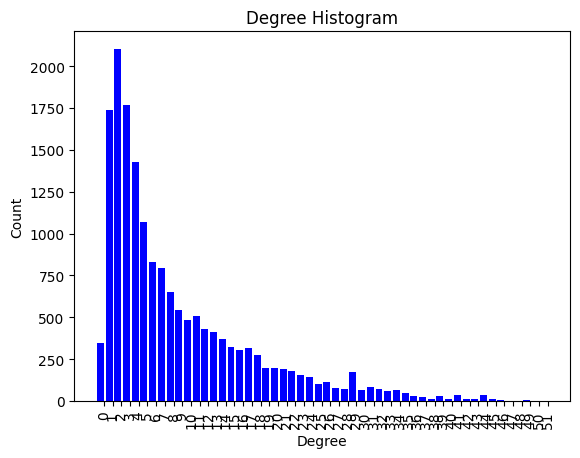

In [27]:
#10% of nodes = ?
ten_percent=int(g.number_of_nodes()*0.10)
temp_g=g.copy()
print('initial number of nodes:',g.number_of_nodes())
print('nodes deleted (10%):',ten_percent)
mostImportantNodes=sorted(nx.degree_centrality(temp_g).items(), key=lambda x : x[1], reverse=True)
for n in range(0,ten_percent):
    node=mostImportantNodes[n][0]
    temp_g.remove_node(node)
print('Number of nodes', len(temp_g.nodes))
print('Number of edges', len(temp_g.edges))
print('Average degree', sum(dict(temp_g.degree).values()) / len(temp_g.nodes))

#get the degree sequence
degree_sequence = sorted([d for n, d in temp_g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.clf()
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg]) 
ax.set_xticklabels(deg)
plt.xticks(rotation='vertical')

#highest 5 degrees
print("highest 5 degrees: ",degree_sequence[:5])

Graph after removing 10% of the most important nodes:
2023-11-11 23:01:21.458264


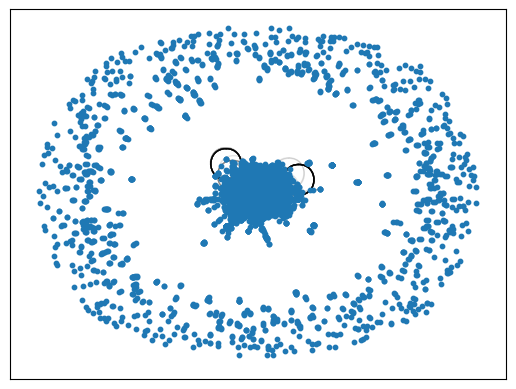

2023-11-11 23:18:57.869429


In [29]:
#drawing the network graph after removing 10%
print('Graph after removing 10% of the most important nodes:')
temp_g.remove_edges_from(nx.selfloop_edges(temp_g))
print(datetime.now())
plt.clf()
pos = nx.spring_layout(temp_g)
nx.draw_networkx_nodes(temp_g, pos, node_size=10)
nx.draw_networkx_edges(temp_g, pos, edge_color='black', alpha=0.1, arrows=True)
plt.show()
print(datetime.now())

## Deleting 20% nodes

initial number of nodes: 18772
nodes deleted (20%): 3754
Number of nodes 15018
Number of edges 40086
Average degree 5.338393927287255
highest 5 degrees:  [30, 30, 30, 28, 28]


<Figure size 640x480 with 0 Axes>

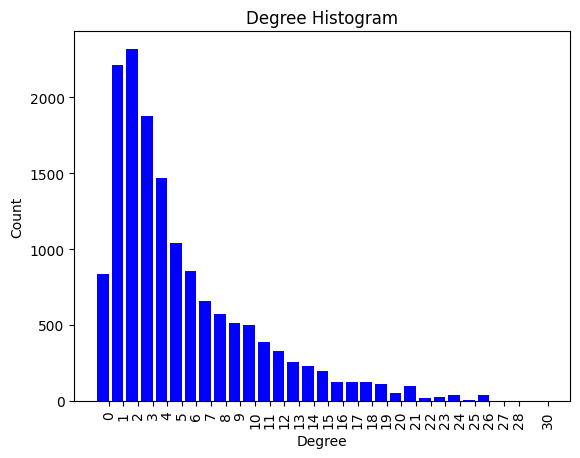

In [32]:
#20% of nodes = ?
twenty_percent=int(g.number_of_nodes()*0.20)
temp_g2=g.copy()
print('initial number of nodes:',g.number_of_nodes())
print('nodes deleted (20%):',twenty_percent)
mostImportantNodes=sorted(nx.degree_centrality(temp_g2).items(), key=lambda x : x[1], reverse=True)
for n in range(0,twenty_percent):
    node=mostImportantNodes[n][0]
    temp_g2.remove_node(node)
print('Number of nodes', len(temp_g2.nodes))
print('Number of edges', len(temp_g2.edges))
print('Average degree', sum(dict(temp_g2.degree).values()) / len(temp_g2.nodes))

#get the degree sequence
degree_sequence = sorted([d for n, d in temp_g2.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.clf()
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.xticks(rotation='vertical')

#highest 5 degrees
print("highest 5 degrees: ",degree_sequence[:5])

Graph after removing 20% of the most important nodes:
2023-11-12 08:45:19.851056


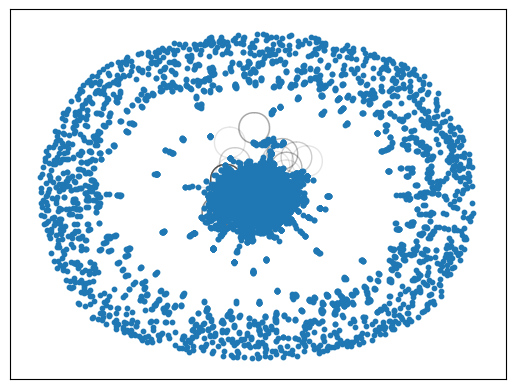

2023-11-12 08:59:39.259771


In [33]:
#drawing the network graph after removing 20%
temp_g2.remove_edges_from(nx.selfloop_edges(temp_g2))
print('Graph after removing 20% of the most important nodes:')
print(datetime.now())
plt.clf()
pos = nx.spring_layout(temp_g2)
nx.draw_networkx_nodes(temp_g2, pos, node_size=10)
nx.draw_networkx_edges(temp_g2, pos, edge_color='black', alpha=0.1, arrows=True)
plt.show()
print(datetime.now())

## Deleting 30% of Nodes

initial number of nodes: 18772
nodes deleted (30%): 5631
Number of nodes 13141
Number of edges 22445
Average degree 3.416026177612054
highest 5 degrees:  [20, 20, 19, 18, 18]


<Figure size 640x480 with 0 Axes>

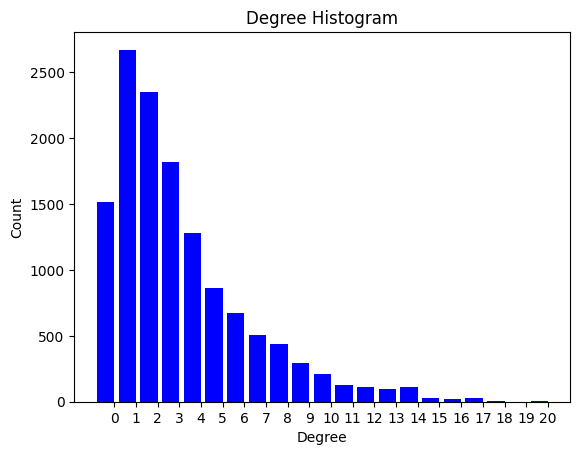

In [34]:
#30% of nodes = ?
thirty_percent=int(g.number_of_nodes()*0.30)
temp_g3=g.copy()
print('initial number of nodes:',g.number_of_nodes())
print('nodes deleted (30%):',thirty_percent)
mostImportantNodes=sorted(nx.degree_centrality(temp_g3).items(), key=lambda x : x[1], reverse=True)
for n in range(0,thirty_percent):
    node=mostImportantNodes[n][0]
    temp_g3.remove_node(node)
print('Number of nodes', len(temp_g3.nodes))
print('Number of edges', len(temp_g3.edges))
print('Average degree', sum(dict(temp_g3.degree).values()) / len(temp_g3.nodes))
#get the degree sequence
degree_sequence = sorted([d for n, d in temp_g3.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.clf()
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

#highest 5 degrees
print("highest 5 degrees: ",degree_sequence[:5])

Graph after removing 30% of the most important nodes:
2023-11-12 09:39:37.710599


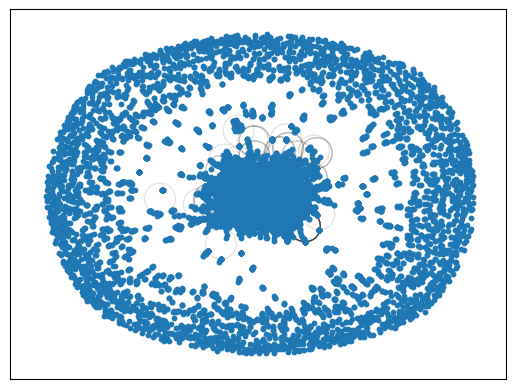

2023-11-12 09:50:36.770156


In [36]:
#drawing the network graph after removing 30%
print('Graph after removing 30% of the most important nodes:')
temp_g3.remove_edges_from(nx.selfloop_edges(temp_g3))
print(datetime.now())
plt.clf()
pos = nx.spring_layout(temp_g3)
nx.draw_networkx_nodes(temp_g3, pos, node_size=10)
nx.draw_networkx_edges(temp_g3, pos, edge_color='black', alpha=0.1, arrows=True)
plt.show()
print(datetime.now())